<h1 align="center" style="color:#0073e6;">PROTOCOLO DE TELEPORTACIÓN CUÁNTICA EN LA ESFERA DE BLOCH</h1>


La **teleportacion** radica en el hecho de trasferir fielmente un estado de un unico qubit entre dos partes, usualmente llamados Alice y Bob, empleando un par de qubits preparados en un **estado de Bell** (maximamente entrelazados) que comparten las dos partes. En el protocolo reportado por Bennet et. al. Alice posee un estado cuantico  $\ket{\Psi}_{inicial} = \alpha \ket{0}+ \beta \ket{1}$ , donde $\alpha$ $\beta$ y son desconocidos para Alice. Adicionalmente, ella y Bob comparten el estado de Bell dado por,
   
<center>

$\ket{\Psi}_{+} = \frac{1}{\sqrt{2}}(\ket{0}_A\ket{0}_B + \ket{1}_A\ket{1}_B)$

</center>
Donde los subindices A y B indican si el qubit esta localizado en el subsistema de Alice o de Bob.

1) Se representa el estado inicial de Alice $\ket{\Psi}_{inicial}$ en la esfera de Bloch para un conjunto de parametros, teniendo en cuenta que $|\alpha|^2+|\beta|^2=1$ para el estado normalizado.


     $\alpha=\sqrt{0.5}, \beta = \sqrt{0.5}$

In [160]:
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [161]:
# Definir los parámetros del estado inicial de Alice

alpha = (0.5)**0.5
beta = (0.5)**0.5
parametros = [alpha, beta]

# Crear los registros cuánticos y clásicos

qreg_names = ['Alice_inicial', 'Alice', 'Bob']
qreg = [QuantumRegister(1, name=name) for name in qreg_names]
creg = ClassicalRegister(2, 'Mediciones')

# Crear el circuito cuántico con 3 qubits y 2 bits clásicos
qc = QuantumCircuit(*qreg, creg)

# Inicializar el estado de Alice (qubit 0)
qc.initialize(parametros, qreg[0])

# Obtener el vector de estado
state = Statevector.from_instruction(qc)


1. A continuación, se muestran los **estados iniciales de cada qubit** en el circuito.  
El **primer qubit** corresponde al **estado inicial de Alice**, que es el estado que se desea teleportar.  
Los **otros dos qubits** son los que **Alice y Bob comparten** para formar el **estado de Bell** $ \ket{\Psi_{+}} $. Estos qubits, por defecto, se inicializan en el estado $ \ket{0} $.


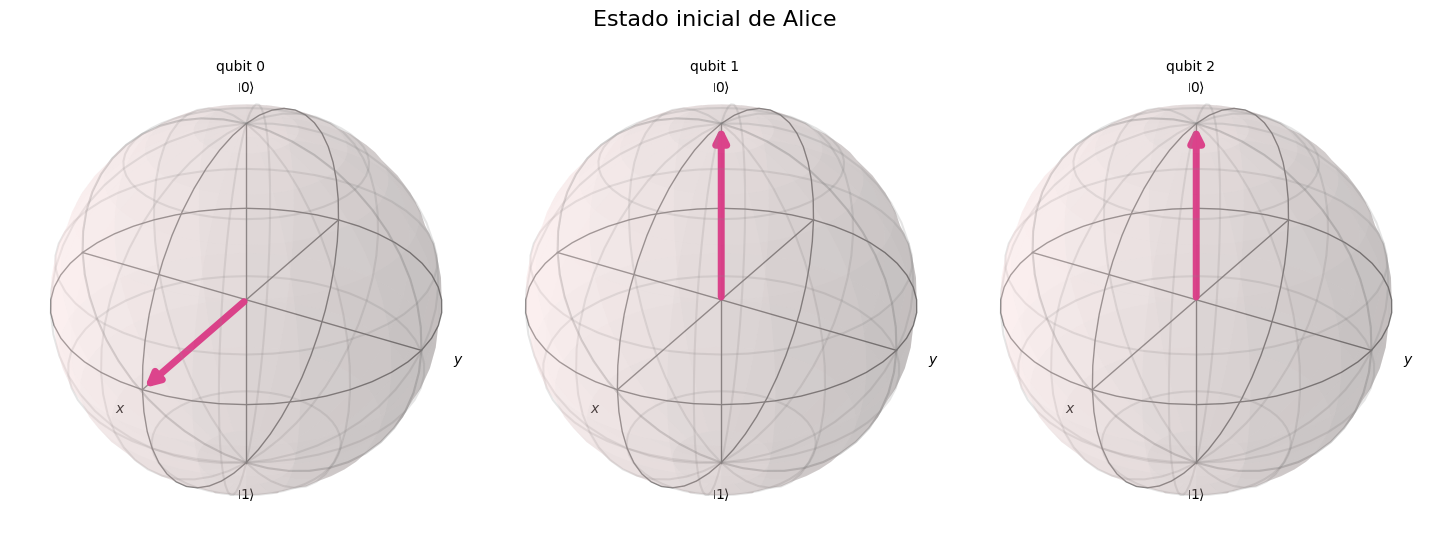

In [162]:
plot_bloch_multivector(state, title="Estado inicial de Alice")

2. Obtener el **estado cuántico compuesto** de los tres qubits correspondientes a los subsistemas de Alice y Bob:  

$$
\ket{\Psi}_{A,B} = \ket{\Psi_{\text{inicial}}} \otimes \ket{\Psi_{+}}
$$

Para ello, se **entrelaza el segundo qubit de Alice con el de Bob**, formando así el **estado de Bell**:

$$
\ket{\Psi_{+}}
$$


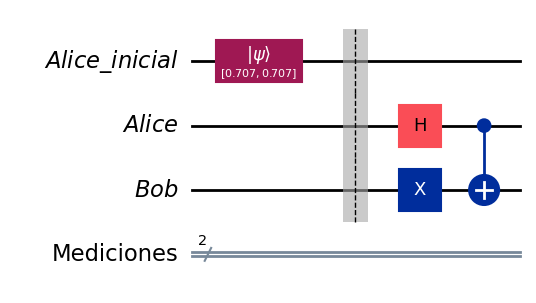

In [163]:
# Aplicar las puertas necesarias para crear el estado de Bell |ψ⟩+  en el circuito

qc.barrier()
qc.x(2)
qc.h(1)
qc.cx(1, 2)

display(qc.draw(output='mpl'))

3. Alice debe **medir en la base de Bell** para colapsar el estado de los qubits de Bob. Para ello, se aplican una **compuerta de Hadamard** y una **compuerta CNOT** al estado cuántico compuesto:

$$
\ket{\Psi}_{A,B}
$$

Dependiendo del **resultado de la medición** obtenido por Alice, Bob deberá aplicar ciertas **operaciones cuánticas** sobre su qubit con el fin de **recuperar el estado inicial de Alice**.


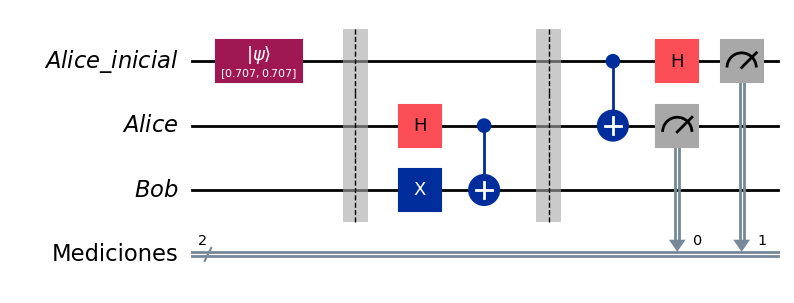

In [164]:
#Realizar la medición en la base de Bell que corresponde a un CNOT y un Hadamard

qc.barrier()
qc.cx(0, 1)
qc.h(0)
qc.measure([1,0], [0,1])


display(qc.draw(output='mpl'))


4. Una vez Alice obtiene sus resultados y los comparte con Bob, él deberá aplicar las compuertas de Pauli \( X \) o \( Z \) correspondientes para recuperar el estado inicial de Alice. Para ello, utilizaremos los **condicionales clásicos** en Qiskit, teniendo en cuenta que debe cumplirse lo siguiente:

```python
if alice == '00':
    qc.x(2)
elif alice == '11':
    qc.z(2)
elif alice == '10':
    qc.z(2)
    qc.x(2)
elif alice == '01':
    pass


El resultado de las medición de Alice en el circuito fue: 01


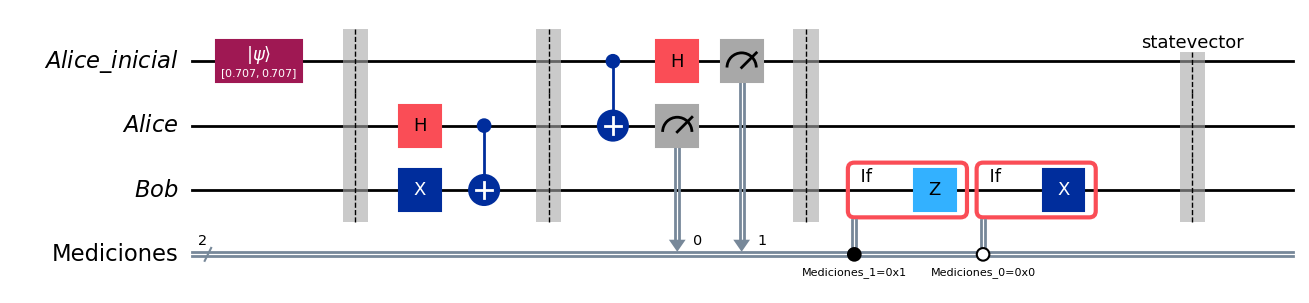

In [ ]:
qc.barrier()
# Si c[1] == 1 -> aplicar Z en Bob
with qc.if_test((qc.clbits[1], 1)):
    qc.z(2)

# Si c[0] == 1 -> aplicar X en Bob
with qc.if_test((qc.clbits[0], 0)):
    qc.x(2)

# Almacenar el vector de estado antes de la medición final
qc.save_statevector()

5. Por último, debemos **simular el circuito cuántico**, para ello utilizamos el **Aer simulator** de Qiskit, que es un backend clásico diseñado para emular el comportamiento de circuitos cuánticos en un computador convencional. Este simulador permite ejecutar el circuito sin necesidad de un dispositivo cuántico real, obteniendo resultados ideales (sin ruido) o realistas (con modelos de ruido si se configuran).

El resultado de las medición de Alice en el circuito fue: 10


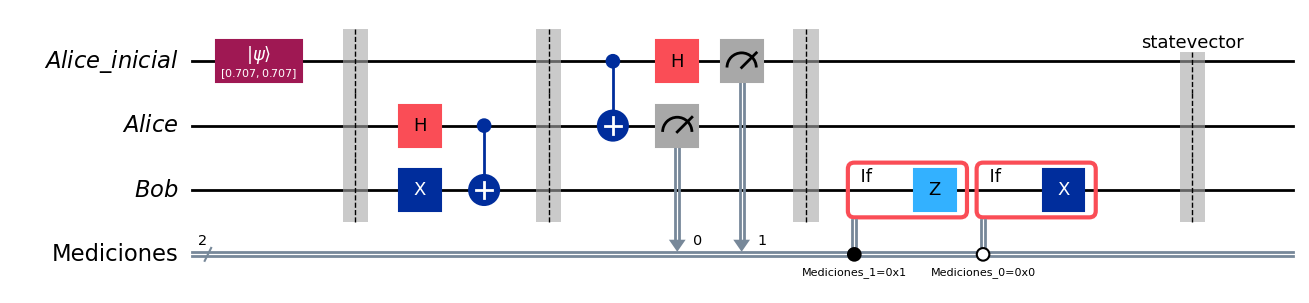

In [167]:
# Ejecutar el circuito
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)
job = simulator.run(circ)
result = job.result()

# Obtener el resultado de las mediciones de Alice
alice = list(result.get_counts().keys())[0]  

# Obtener el vector de estado del circuito
statevector = result.data(0)['statevector']

print(f'El resultado de las medición de Alice en el circuito fue: {alice}')
display(circ.draw(output='mpl'))

6. Finalmente, se representa el **estado final de Bob** en la **esfera de Bloch**.  
Obsérvese que el estado final de Bob (qubit 2) coincide con el **estado inicial de Alice (qubit 0)** mostrado en el punto 1. Esto confirma que el **estado cuántico de Alice ha sido correctamente teleportado** a Bob mediante el protocolo de teleportación cuántica.

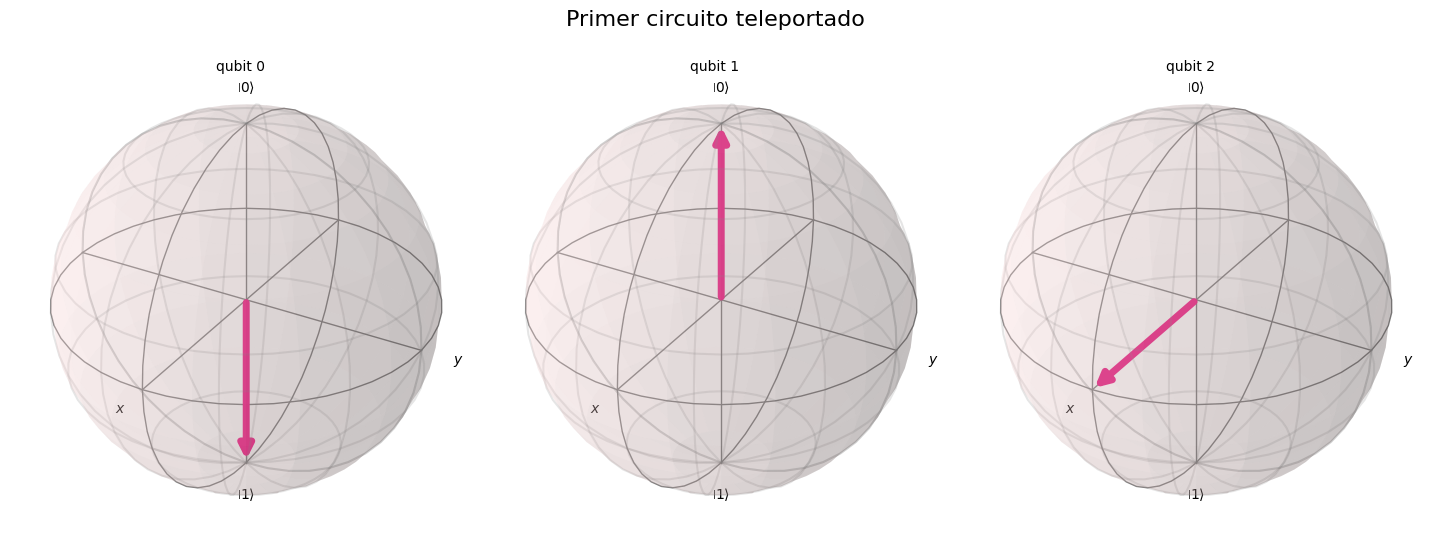

In [166]:
plot_bloch_multivector(statevector, title='Primer circuito teleportado')